In [269]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, model_selection, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [206]:
train = pd.read_csv('train-1.csv')
test = pd.read_csv('test.csv')

In [207]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [211]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [213]:
###-----------------------------------------------------------------------------------

In [214]:
###-----------------------------------------------------------------------------------

In [243]:
### ANÁLISE SIMPLES DOS DADOS

In [244]:
### FUNÇÃO PARA MOSTRAR INFORMAÇÕES ÚTEIS

In [217]:
def function(data, colum, count = True):
  print(f'qtd de valores único:  {data[colum].nunique()}')
  print(f'valores único:  {data[colum].unique()}')
  print(f'qtd de valores nulos:  {data[colum].isnull().sum()}')
  print(f'qtd de cada valor unico: {data[colum].value_counts()}')

  if count == True:
    sns.countplot(data=data, x=colum, hue='Survived')
  else:
    sns.displot(data[colum], kde = True)

In [191]:
### média idade

In [157]:
train['Age'].mean()

29.298731762065092

In [192]:
### média passagem por classe

In [177]:
train[train['Pclass']==1]['Fare'].mean()


84.1546875

In [179]:
train[train['Pclass']==2]['Fare'].mean()

20.662183152173913

In [180]:
train[train['Pclass']==3]['Fare'].mean()

13.675550101832993

In [193]:
### classe 1 bem mais cara que as outras

qtd de valores único:  3
valores único:  [3 1 2]
qtd de valores nulos:  0
qtd de cada valor unico: 3    491
1    216
2    184
Name: Pclass, dtype: int64


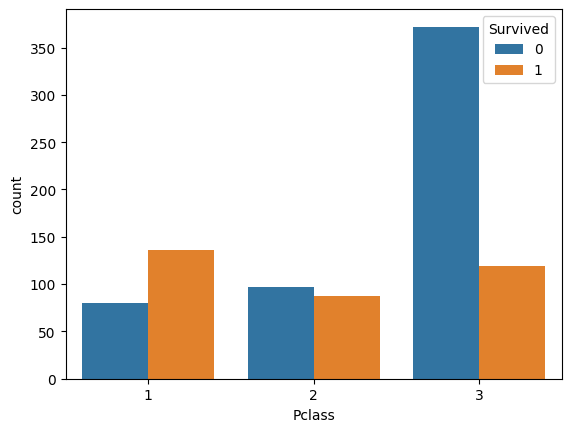

In [219]:
function(train, 'Pclass')

In [ ]:
### é possível ver uma relação entre o valor da passagem e o número de sobreviventes

In [186]:
train[train['Pclass']==1]['Survived'].mean()

0.6296296296296297

In [188]:
train[train['Pclass']==2]['Survived'].mean()

0.47282608695652173

In [190]:
train[train['Pclass']==3]['Survived'].mean()

0.24236252545824846

In [194]:
###a classe 1 teve bem mais sobreviventes

qtd de valores único:  88
valores único:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
qtd de valores nulos:  177
qtd de cada valor unico: 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


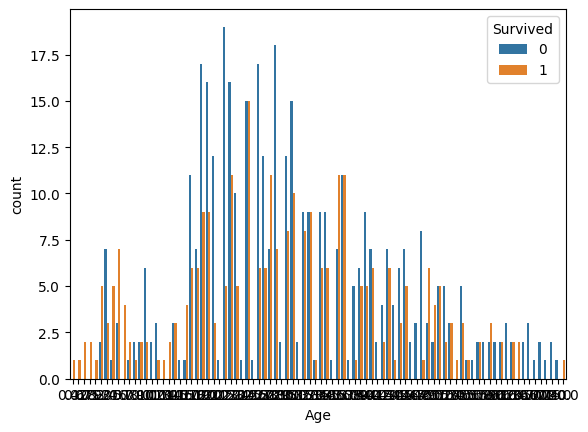

In [220]:
function(train, 'Age')

In [204]:
### apenas analisando o gráfico não pude dizer se a idade realmente colabora para o fato de se a pessoa sobreviveu ou não
###pois o número de pessoas com idades entre 24 e 28 é muito maior que os outros grupos etários, e consequentemente possui mais mortes

In [245]:
###-----------------------------------------------------------------------------------

In [246]:
###-----------------------------------------------------------------------------------

In [247]:
### TRATAMENTO DOS DADOS

In [248]:
df = train.append(test, ignore_index=True)

<ipython-input-248-d0aeaeee3f9b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test, ignore_index=True)


In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [61]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

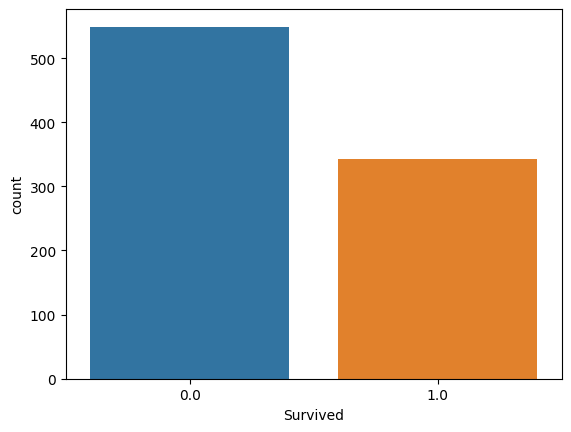

In [63]:
sns.countplot(data=df, x='Survived')

qtd de valores único:  3
valores único:  [3 1 2]
qtd de valores nulos:  0


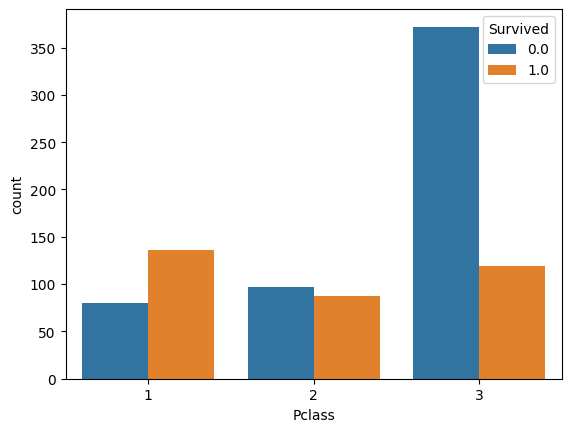

In [64]:
function(df, 'Pclass')

qtd de valores único:  2
valores único:  ['male' 'female']
qtd de valores nulos:  0


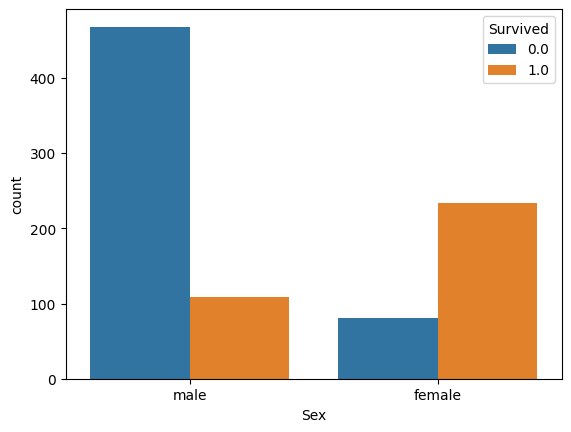

In [65]:
function(df, 'Sex')

qtd de valores único:  98
valores único:  [22.   38.   26.   35.   25.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   30.   31.   34.   15.   28.    8.   19.   40.   66.   42.
 21.   18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.
 32.   16.    0.83 33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
qtd de valores nulos:  0
qtd de cada valor unico: 25.0    242
39.0     59
30.0     56
24.0     47
22.0     43
       ... 
23.5      1
70.5      1
55.5      1
20.5      1
38.5      1
Name: Age, Length: 98, dtype: int64


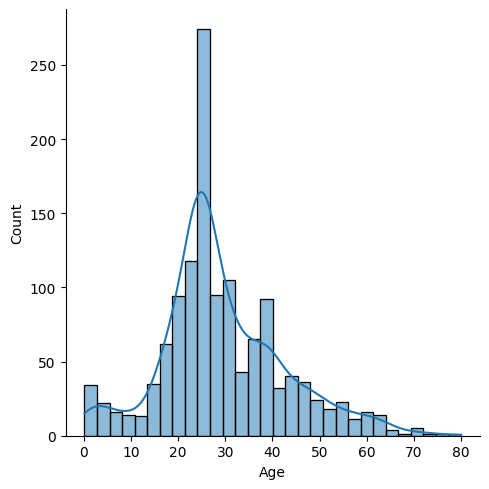

In [230]:
function(df, 'Age', False)

In [242]:
### novo df

In [68]:
df_novo = pd.DataFrame()

In [241]:
### adicionando survived ao novo df

In [70]:
df['Survived'].unique()

array([ 0.,  1., nan])

In [71]:
df_novo['Survived'] = df['Survived']
df_novo

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


In [240]:
### adicionando sexo

In [73]:
df_novo['Gender'] = df['Sex']
df_novo

,Survived,Gender
0,0.0,male
1,1.0,female
2,1.0,female
3,1.0,female
4,0.0,male
...,...,...
1304,NaN,male
1305,NaN,female
1306,NaN,male
1307,NaN,male


In [239]:
### adicionando pclass

In [75]:
df_novo['Pclass'] = df['Pclass']
df_novo

,Survived,Gender,Pclass
0,0.0,male,3
1,1.0,female,1
2,1.0,female,3
3,1.0,female,1
4,0.0,male,3
...,...,...,...
1304,NaN,male,3
1305,NaN,female,1
1306,NaN,male,3
1307,NaN,male,3


In [76]:
df_novo['Gender'] = df_novo['Gender'].replace(['male', 'female'], [0, 1])
df_novo

,Survived,Gender,Pclass
0,0.0,0,3
1,1.0,1,1
2,1.0,1,3
3,1.0,1,1
4,0.0,0,3
...,...,...,...
1304,NaN,0,3
1305,NaN,1,1
1306,NaN,0,3
1307,NaN,0,3


In [238]:
### adicionando idade

qtd de valores único:  98
valores único:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
qtd de valores nulos:  263


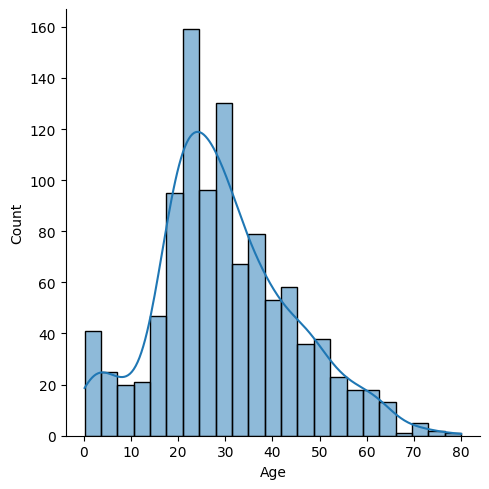

In [78]:
function(df, 'Age', False)

In [237]:
### idade tem bastante valores nulos

In [80]:
df.corr()

<ipython-input-80-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [236]:
### pclass tem corelação alta com idade

In [86]:
df[df['Pclass']==1]['Age'].mean()


39.15992957746479

In [87]:
df[df['Pclass']==2]['Age'].mean()

29.506704980842912

In [88]:

df[df['Pclass']==3]['Age'].mean()

24.81636726546906

In [235]:
## substituindo null pela média de idade de cada pclass

In [98]:
cout=0
for i in df.index:
  if pd.isnull(df['Age'][i]):
    if df['Pclass'][i] == 1:
      df['Age'][i] = round(df[df['Pclass']==1]['Age'].mean())
    elif df['Pclass'][i] == 2:
      df['Age'][i] = round(df[df['Pclass']==2]['Age'].mean())
    elif df['Pclass'][i] == 3:
      df['Age'][i] = round(df[df['Pclass']==3]['Age'].mean())
  else:
    continue



qtd de valores único:  98
valores único:  [22.   38.   26.   35.   25.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   30.   31.   34.   15.   28.    8.   19.   40.   66.   42.
 21.   18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.
 32.   16.    0.83 33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
qtd de valores nulos:  0


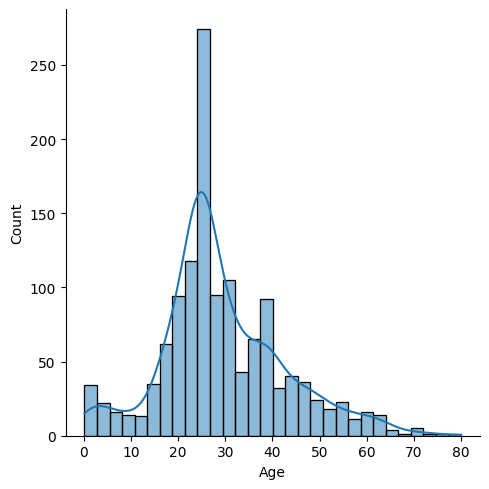

In [100]:
function(df, 'Age', False)

In [234]:
### blz, sem valores nulos de idade

In [101]:
df_novo['Age'] = df['Age']

In [102]:
df_novo.isnull().sum()

Survived    418
Gender        0
Pclass        0
Age           0
dtype: int64

In [233]:
### agora adicionando SibSp

qtd de valores único:  7
valores único:  [1 0 3 4 2 5 8]
qtd de valores nulos:  0


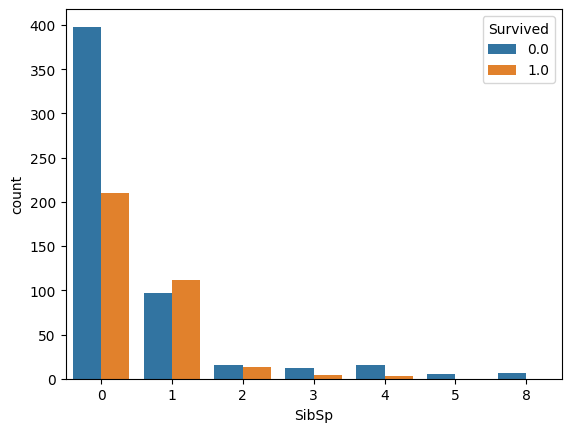

In [105]:
function(df, 'SibSp')

In [108]:
df_novo['SibSp'] = df['SibSp']
df_novo

,Survived,Gender,Pclass,Age,SibSp
0,0.0,0,3,22.0,1
1,1.0,1,1,38.0,1
2,1.0,1,3,26.0,0
3,1.0,1,1,35.0,1
4,0.0,0,3,35.0,0
...,...,...,...,...,...
1304,NaN,0,3,25.0,0
1305,NaN,1,1,39.0,0
1306,NaN,0,3,38.5,0
1307,NaN,0,3,25.0,0


In [232]:
### adicionando Parch

qtd de valores único:  8
valores único:  [0 1 2 5 3 4 6 9]
qtd de valores nulos:  0


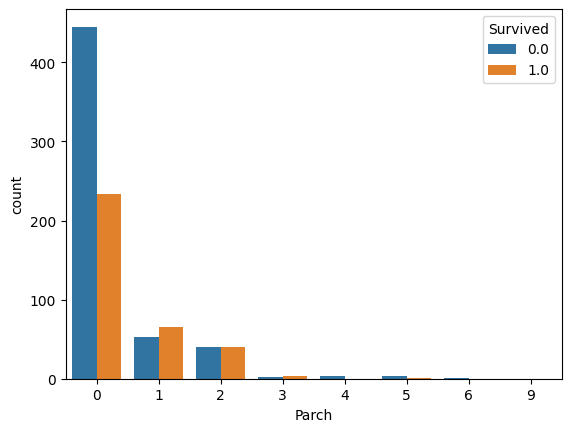

In [110]:
function(df, 'Parch')

In [112]:
df_novo['Parch'] = df['Parch']
df_novo

,Survived,Gender,Pclass,Age,SibSp,Parch
0,0.0,0,3,22.0,1,0
1,1.0,1,1,38.0,1,0
2,1.0,1,3,26.0,0,0
3,1.0,1,1,35.0,1,0
4,0.0,0,3,35.0,0,0
...,...,...,...,...,...,...
1304,NaN,0,3,25.0,0,0
1305,NaN,1,1,39.0,0,0
1306,NaN,0,3,38.5,0,0
1307,NaN,0,3,25.0,0,0


In [113]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


qtd de valores único:  281
valores único:  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.0

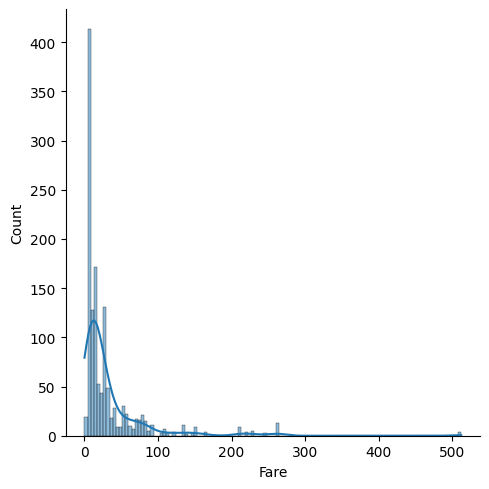

In [114]:
function(df, 'Fare', False)

In [116]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [122]:
df[df['Pclass']==3]['Fare'].mean()

13.302888700564973

In [125]:
df['Fare'].fillna(df[df['Pclass']==3]['Fare'].mean(), inplace=True)

In [127]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [129]:
df_novo['Fare'] = df['Fare']
df_novo

,Survived,Gender,Pclass,Age,SibSp,Parch,Fare
0,0.0,0,3,22.0,1,0,7.2500
1,1.0,1,1,38.0,1,0,71.2833
2,1.0,1,3,26.0,0,0,7.9250
3,1.0,1,1,35.0,1,0,53.1000
4,0.0,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,NaN,0,3,25.0,0,0,8.0500
1305,NaN,1,1,39.0,0,0,108.9000
1306,NaN,0,3,38.5,0,0,7.2500
1307,NaN,0,3,25.0,0,0,8.0500


In [231]:
### método para pegar titulos das pessoas

In [132]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [133]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,Mr


In [134]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [138]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

qtd de valores único:  18
valores único:  ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
qtd de valores nulos:  0


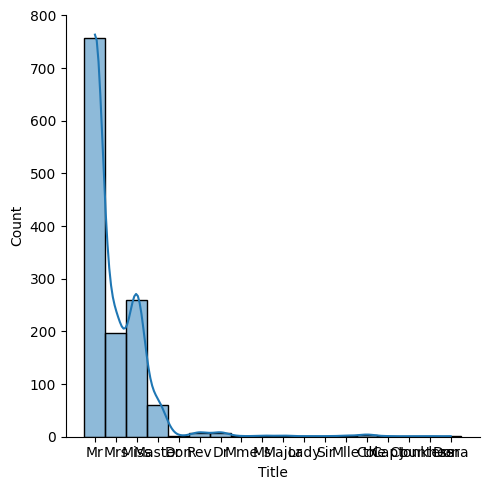

In [136]:
function(df, 'Title', False)

In [140]:
df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in df['Title']]

In [141]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Person
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,Mr


In [143]:
df_novo['Title'] = df['Title']
df_novo

,Survived,Gender,Pclass,Age,SibSp,Parch,Fare,Title
0,0.0,0,3,22.0,1,0,7.2500,Mr
1,1.0,1,1,38.0,1,0,71.2833,Mrs
2,1.0,1,3,26.0,0,0,7.9250,Miss
3,1.0,1,1,35.0,1,0,53.1000,Mrs
4,0.0,0,3,35.0,0,0,8.0500,Mr
...,...,...,...,...,...,...,...,...
1304,NaN,0,3,25.0,0,0,8.0500,Mr
1305,NaN,1,1,39.0,0,0,108.9000,Person
1306,NaN,0,3,38.5,0,0,7.2500,Mr
1307,NaN,0,3,25.0,0,0,8.0500,Mr


In [146]:
pclass = pd.get_dummies(df_novo['Pclass'], prefix = 'Pclass', drop_first=True)
title = pd.get_dummies(df_novo['Title'], prefix = 'Title', drop_first=True)

In [150]:
df_final = pd.concat([df_novo, pclass, title], axis=1)
df_final

,Survived,Gender,Pclass,Age,SibSp,Parch,Fare,Title,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,0,3,22.0,1,0,7.2500,Mr,0,1,0,1,0,0
1,1.0,1,1,38.0,1,0,71.2833,Mrs,0,0,0,0,1,0
2,1.0,1,3,26.0,0,0,7.9250,Miss,0,1,1,0,0,0
3,1.0,1,1,35.0,1,0,53.1000,Mrs,0,0,0,0,1,0
4,0.0,0,3,35.0,0,0,8.0500,Mr,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,3,25.0,0,0,8.0500,Mr,0,1,0,1,0,0
1305,NaN,1,1,39.0,0,0,108.9000,Person,0,0,0,0,0,1
1306,NaN,0,3,38.5,0,0,7.2500,Mr,0,1,0,1,0,0
1307,NaN,0,3,25.0,0,0,8.0500,Mr,0,1,0,1,0,0


In [151]:
df_final.drop(['Pclass', 'Title'], axis = 1, inplace = True)

In [152]:
df_final

,Survived,Gender,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,0,22.0,1,0,7.2500,0,1,0,1,0,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,0,1,1,0,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,8.0500,0,1,0,1,0,0
1305,NaN,1,39.0,0,0,108.9000,0,0,0,0,0,1
1306,NaN,0,38.5,0,0,7.2500,0,1,0,1,0,0
1307,NaN,0,25.0,0,0,8.0500,0,1,0,1,0,0


In [167]:
train_test = df_final[:891].copy()
test_test = df_final[891:].copy()

In [253]:
train_test

,Survived,Gender,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,0,22.0,1,0,7.2500,0,1,0,1,0,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,0,1,1,0,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,0,13.0000,1,0,0,0,0,1
887,1.0,1,19.0,0,0,30.0000,0,0,1,0,0,0
888,0.0,1,25.0,1,2,23.4500,0,1,1,0,0,0
889,1.0,0,26.0,0,0,30.0000,0,0,0,1,0,0


In [252]:
test_test

,Survived,Gender,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person
891,NaN,0,34.5,0,0,7.8292,0,1,0,1,0,0
892,NaN,1,47.0,1,0,7.0000,0,1,0,0,1,0
893,NaN,0,62.0,0,0,9.6875,1,0,0,1,0,0
894,NaN,0,27.0,0,0,8.6625,0,1,0,1,0,0
895,NaN,1,22.0,1,1,12.2875,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,8.0500,0,1,0,1,0,0
1305,NaN,1,39.0,0,0,108.9000,0,0,0,0,0,1
1306,NaN,0,38.5,0,0,7.2500,0,1,0,1,0,0
1307,NaN,0,25.0,0,0,8.0500,0,1,0,1,0,0


In [259]:
train_test['Survived'] = train_test['Survived'].astype(int)
train_test

,Survived,Gender,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0,0,22.0,1,0,7.2500,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,0,0,35.0,0,0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,1,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,0
888,0,1,25.0,1,2,23.4500,0,1,1,0,0,0
889,1,0,26.0,0,0,30.0000,0,0,0,1,0,0


In [260]:
###-----------------------------------------------------------------------------------

In [261]:
###-----------------------------------------------------------------------------------

In [262]:
### USANDO RANDOM FOREST

In [263]:
X = train_test.drop('Survived', axis = 1)
y = train_test['Survived']

In [272]:

modelo = RandomForestClassifier().fit(X, y)
acuracia = round(modelo.score(X, y)*100, 2)

train_pred = model_selection.cross_val_predict(RandomForestClassifier(), X, y,cv = 10, n_jobs = -1)
acuracia_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)

print(f'Acurácia: {acuracia}')
print(f'Acurácia cv: {acuracia_cv}')

Acurácia: 98.32
Acurácia cv: 80.81


In [273]:
### resultado satisfatório(?)

In [221]:
###-----------------------------------------------------------------------------------

In [222]:
###-----------------------------------------------------------------------------------

In [223]:
### REGRESSÃO LINEAR(TENTANDO)

In [225]:
regressor = LinearRegression()

In [249]:
### TENTANDO A RL COM AGE

In [256]:
###X = train_test['Age'].reshape(-1,1)
###train_test['Age']
### durante a aula o exemplo dado era com um array básico e usava o reshape. Passando uma coluna como parâmetro ela dá um erro
### dizendo que precisa ser um array 2D, mas esse reshape não funciona com colunas no df.
### não sei fazer

In [251]:
y = train_test['Survived']

In [257]:
###regressor.fit(X,y)